In [1]:
from random import uniform, randint
from typing import List, Dict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev
from scipy.stats import norm

In [2]:
SAMPLES = 5000

In [3]:
base = [randint(1, 100) for _ in range(SAMPLES)]
res = []
zeros = 0
ones = 0
for i in base:
    if i < 50:
        res.append(0)
        zeros += 1
    else:
        res.append(1)
        ones += 1
print(zeros)
print(ones)

2456
2544


In [4]:
noise = [randint(1,100) for _ in range(SAMPLES)]

In [5]:
data = {}
data["base"] = base
data["noise"] = noise
data["result"] = res


In [6]:
df = pd.DataFrame(data)
df.head(5)

,base,noise,result
0,49,51,0
1,12,19,0
2,29,52,0
3,56,15,1
4,95,81,1


In [7]:
all_features = df.drop("result",axis=1)
Targeted_feature = df["result"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 2), (1500, 2), (3500,), (1500,))

In [8]:
FIRST_LAYER = 10
model = Sequential()
model.add(Dense(FIRST_LAYER, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-11-03 09:57:46.096258: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-03 09:57:46.096378: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

In [10]:
history = create_history(len(X_train.columns), FIRST_LAYER)
history

{0: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []},
 1: {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}}

In [11]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(
      x=X_train, 
      y=y_train, 
      epochs=1,
      batch_size=100,
    )
    all_weights = model.layers[0].get_weights()[0].tolist()
    for column in range(len(all_weights)):
        for node in range(len(all_weights[column])):
            history[column][node].append(all_weights[column][node])

RUNNING EPOCH 1


2022-11-03 09:57:46.208112: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-03 09:57:46.423779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 5ms/step - loss: 13.8405 - accuracy: 0.5031
RUNNING EPOCH 2
35/35 [==============================] - 0s 5ms/step - loss: 4.2861 - accuracy: 0.5394
RUNNING EPOCH 3
35/35 [==============================] - 0s 6ms/step - loss: 0.5397 - accuracy: 0.7746
RUNNING EPOCH 4
35/35 [==============================] - 0s 6ms/step - loss: 0.4068 - accuracy: 0.7951
RUNNING EPOCH 5
35/35 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.8023
RUNNING EPOCH 6
35/35 [==============================] - 0s 6ms/step - loss: 0.3528 - accuracy: 0.8151
RUNNING EPOCH 7
35/35 [==============================] - 0s 5ms/step - loss: 0.3422 - accuracy: 0.8229
RUNNING EPOCH 8
35/35 [==============================] - 0s 5ms/step - loss: 0.3324 - accuracy: 0.8274
RUNNING EPOCH 9
35/35 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8377
RUNNING EPOCH 10
35/35 [==============================] - 0s 5ms/step - loss: 0.3211 - a

In [12]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

In [13]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1, 1 + FIRST_LAYER)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,1 + FIRST_LAYER)]
    )

In [14]:
def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i])
    return group

In [15]:
values = get_groups(0, FIRST_LAYER)
noises = get_groups(1, FIRST_LAYER)

In [16]:
all_fields = [values, noises]
colors = [important, noise]

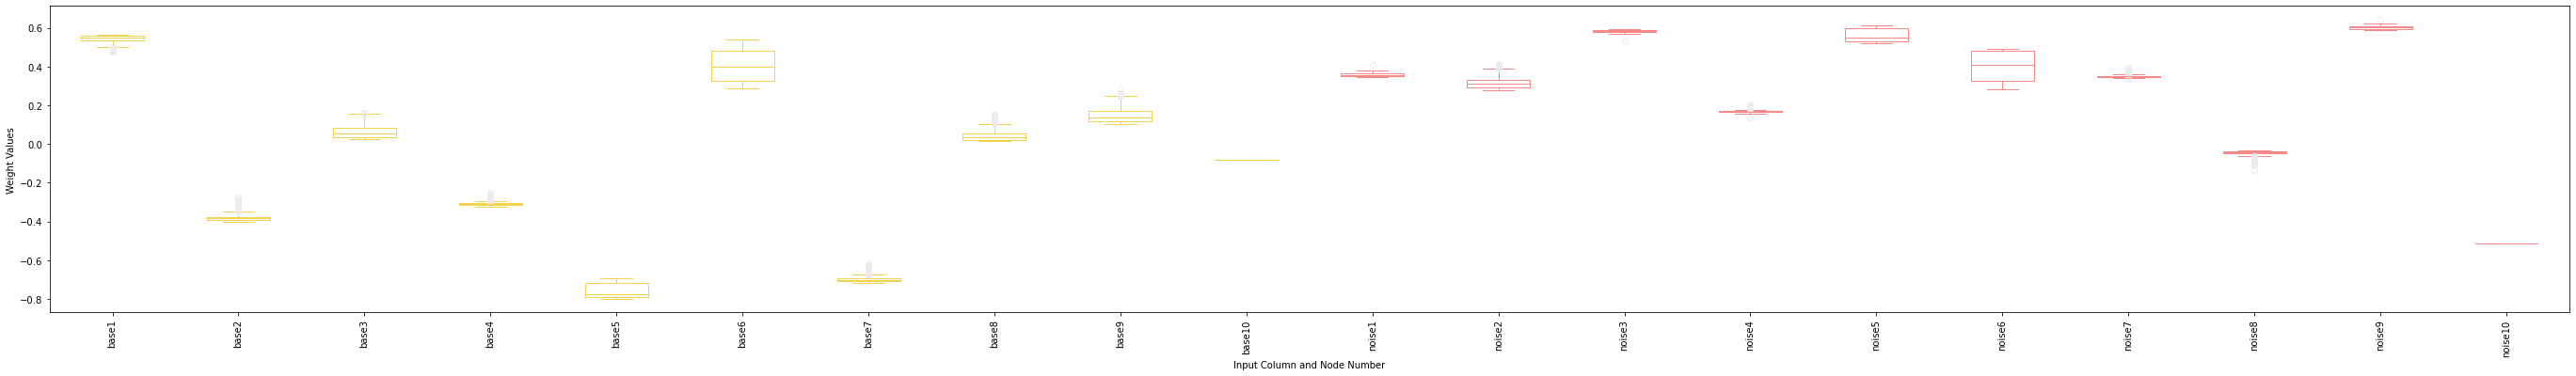

In [17]:
fig, ax = plt.subplots(figsize=(48,6))
column_names = list(df.columns[:-1])

for i, field in enumerate(all_fields):
    generate_box_plot(ax, field, colors[i], column_names[i], i * FIRST_LAYER, showfliers=True)
for label in ax.get_xticklabels():
    label.set_rotation(90)

In [18]:
def get_group_by_node(index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [19]:
def plot_pdfs(group, colors):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

In [20]:
groups = [get_group_by_node(i) for i in range(FIRST_LAYER)]
groups[0]

[[0.5140737891197205,
  0.48323988914489746,
  0.4815645217895508,
  0.4783623516559601,
  0.47654300928115845,
  0.4767262041568756,
  0.4775320291519165,
  0.4777023196220398,
  0.4785299003124237,
  0.4792865216732025,
  0.47964897751808167,
  0.4808529317378998,
  0.48141026496887207,
  0.4819180965423584,
  0.4824889004230499,
  0.4833480715751648,
  0.48423027992248535,
  0.48498809337615967,
  0.4853283762931824,
  0.4866710603237152,
  0.4873783588409424,
  0.48815956711769104,
  0.4886546730995178,
  0.49000319838523865,
  0.49106696248054504,
  0.49239495396614075,
  0.49316859245300293,
  0.4938410520553589,
  0.4952514171600342,
  0.49637433886528015,
  0.49735936522483826,
  0.4986009895801544,
  0.4996667206287384,
  0.5002124905586243,
  0.5014864206314087,
  0.5012302398681641,
  0.5000309348106384,
  0.5003363490104675,
  0.5009284019470215,
  0.502647340297699,
  0.5012645721435547,
  0.5027912259101868,
  0.5036247372627258,
  0.5040618777275085,
  0.5049113035202026

/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


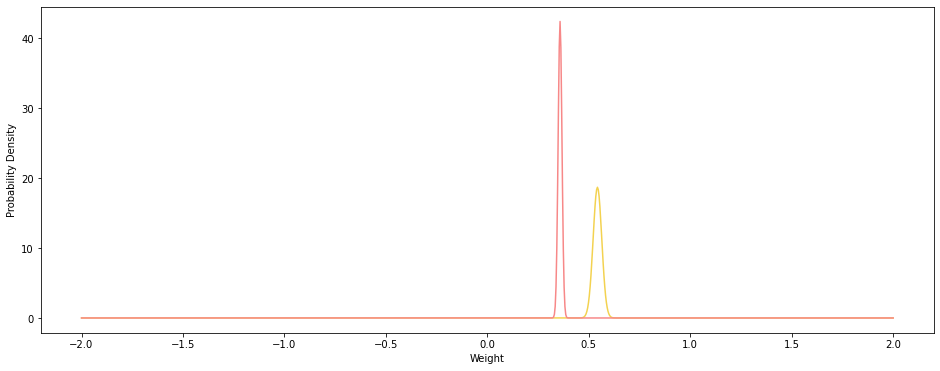

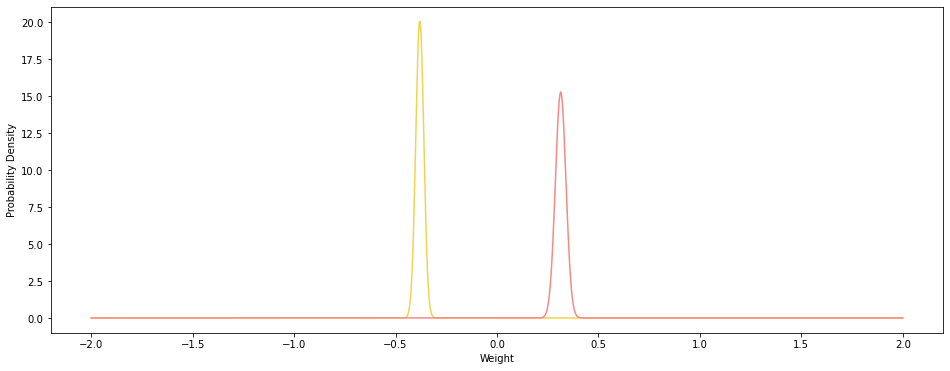

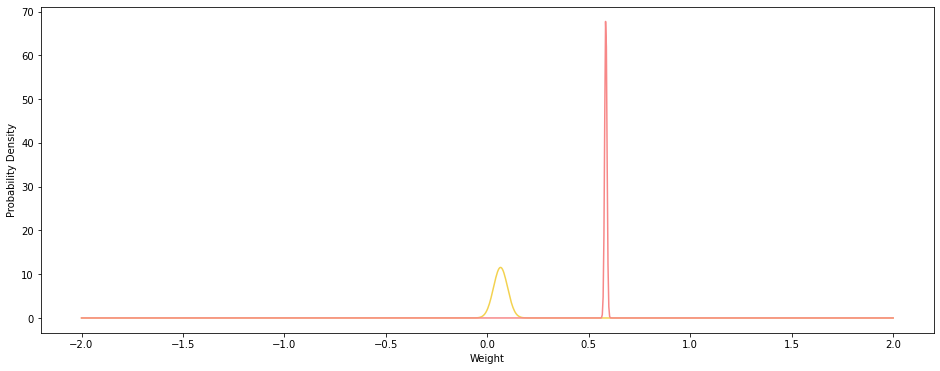

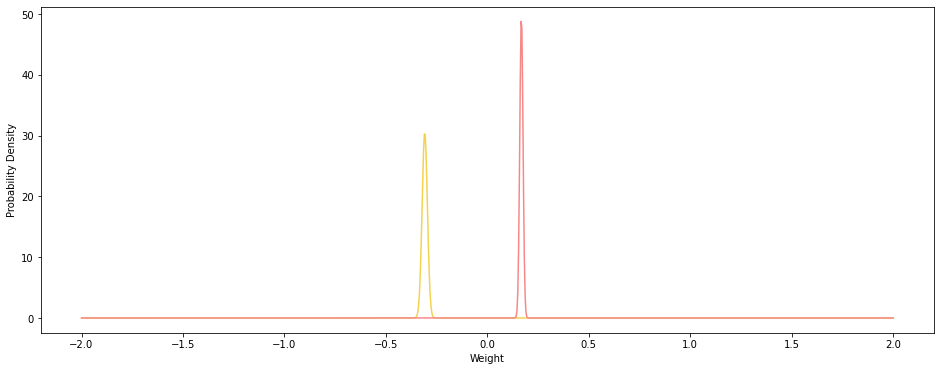

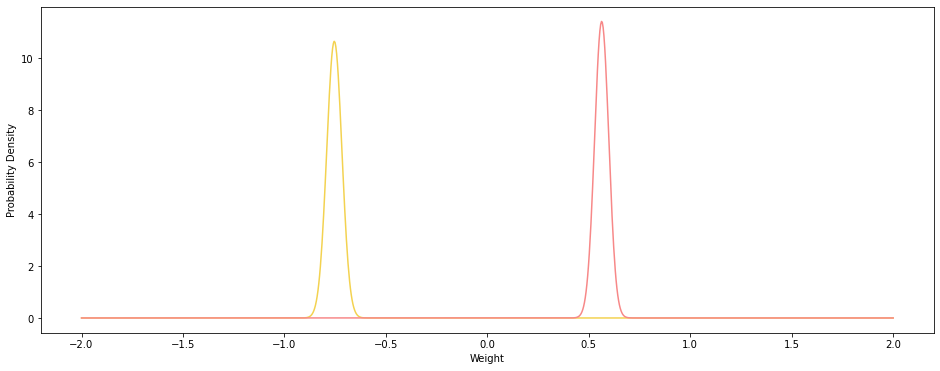

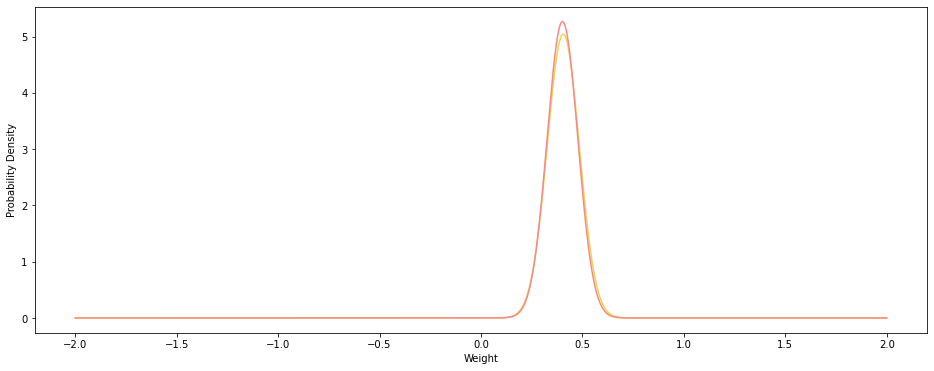

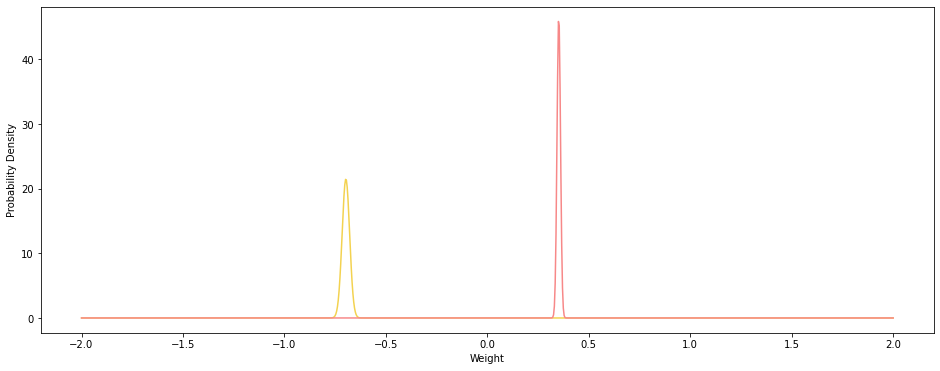

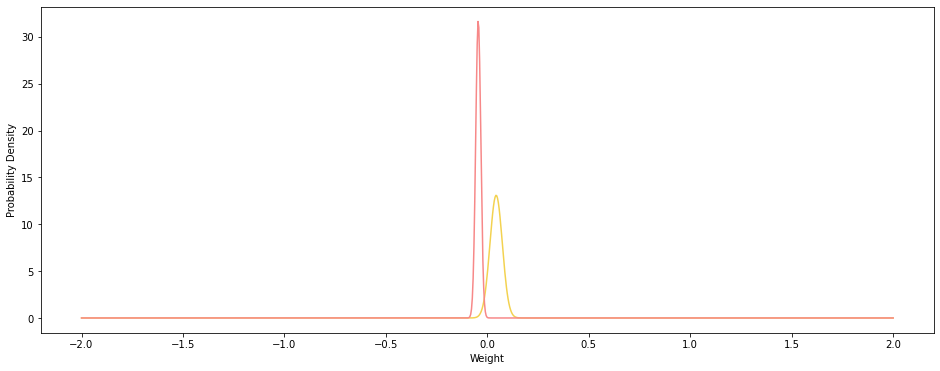

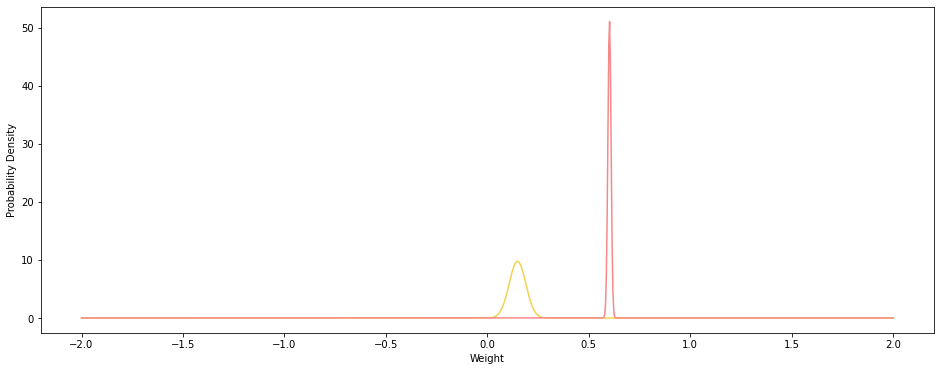

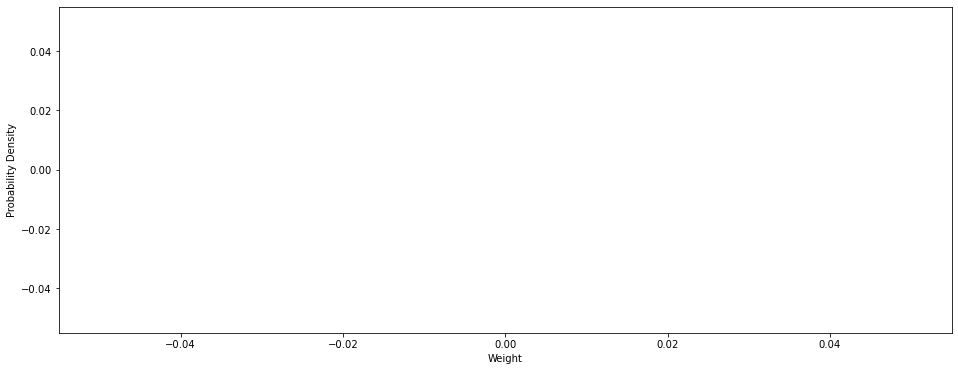

In [21]:
for group in groups:
    plot_pdfs(group, colors)

In [22]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            try:
                if math.floor(prob) != 0:
                    values.append(abs(prob))
            except ValueError:
                pass
        results.append(values)
    return results

In [23]:
columns = list(df.columns)[:-1]

In [24]:
len(groups)

10

In [25]:
all_probs = [get_props(group) for group in groups]

/Users/e.blackledge/miniforge3/envs/network/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [26]:
def barrage(all_probs, columns: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(columns)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            if len(prob) > 0:
                res[i]["len"] += len(prob)
                res[i]["max"] += max(prob)
                res[i]["sum"] += sum(prob)
                res[i]["mean"] += mean(prob)
                res[i]["stdev"] += stdev(prob)
    return res

In [27]:
length = len(list(df.columns)[:-1])
res = barrage(all_probs, length)
for i in range(length):
    res[columns[i]] = res.pop(i)
res

{'base': {'len': 317,
  'max': 140.5459778510932,
  'sum': 2187.552249940678,
  'mean': 73.55186715602674,
  'stdev': 46.10307684214404},
 'noise': {'len': 211,
  'max': 319.4253289088614,
  'sum': 2212.0946593619674,
  'mean': 147.23960921446078,
  'stdev': 115.06052808297927}}

In [28]:
df = pd.DataFrame(res)
df

,base,noise
len,317.000000,211.000000
max,140.545978,319.425329
sum,2187.552250,2212.094659
mean,73.551867,147.239609
stdev,46.103077,115.060528


<AxesSubplot:>

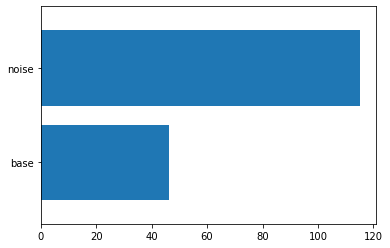

In [29]:
pd.Series(df.loc["stdev"],df.columns).sort_values(ascending=True).plot.barh(width=0.8)